# Tests for classification of detections

In [1]:
import os
import argparse
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
gt_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/DBT-P00538_DBT-S01986_rmlo_mass1_slice44.txt'
pred_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/inf_DBT-P00538_DBT-S01986_rmlo_mass1_slice44.txt'

gt_df = pd.read_csv(gt_txt, sep=' ', header=None)
pred_df = pd.read_csv(pred_txt, sep=' ', header=None)

In [9]:

gt_list = []
pred_list = []

for idx in gt_df.index:
    x_center = gt_df.iloc[idx][1]
    y_center = gt_df.iloc[idx][2]
    width = gt_df.iloc[idx][3]
    height = gt_df.iloc[idx][4]

    gt_element = [x_center, y_center, width, height]
    gt_list.append(gt_element)

idx = 3

x_center = pred_df.iloc[idx][1]
y_center = pred_df.iloc[idx][2]
width = pred_df.iloc[idx][3]
height = pred_df.iloc[idx][4]
confidence = pred_df.iloc[idx][5]

pred_element = [x_center, y_center, width, height, confidence]
pred_list.append(pred_element)

In [10]:
pred_list[0]

[0.584419, 0.568987, 0.111723, 0.0830281, 0.423099]

In [11]:
gt_list

[[0.594689378757515,
  0.571021571021571,
  0.0470941883767535,
  0.0407000407000407],
 [0.6598196392785571,
  0.5848595848595849,
  0.0485971943887775,
  0.0394790394790394]]

In [12]:
def draw_box(
    image,
    x_center,
    y_center,
    width,
    height,
    img_width,
    img_height,
    color = None,
    lw=4,
):
    
    """Draw bounding box on an image

    Arguments:
        image {np.ndarray}: Numpy array of the image
        x {int}: X coordinate of the bounding-box (from csv)
        y {int}: Y coordinate of the bounding-box (from csv)
        width {float}: Width of the bounding-box (from csv)
        hight {float}: Hight of the bounding-box (from csv)
        img_width {int}: Width of the NPY image
        img_height {int}: Height of the NPY image
        color {}: Color of the bounding-box (default: {None})
        lw {int}: Line width (default: {4})

    Returns:
        image {np.ndarray}: Numpy array of the image with the bounding-box
    """
    # converto
    x = int(x_center * img_width - (width * img_width) // 2)
    y = int(y_center * img_height - (height * img_height) // 2)

    width = int(width * img_width)
    height = int(height * img_height)

    x = min(max(x, 0), image.shape[1] - 1)
    y = min(max(y, 0), image.shape[0] - 1)
    if color is None:
        color = np.max(image)
    if len(image.shape) > 2 and not hasattr(color, "__len__"):
        color = (color,) + (0,) * (image.shape[-1] - 1)
    image[y : y + lw, x : x + width] = color
    image[y + height - lw : y + height, x : x + width] = color
    image[y : y + height, x : x + lw] = color
    image[y : y + height, x + width - lw : x + width] = color
    return image

In [13]:
img = '/Users/andreaberti/Documents/work/DBT/test_inference/valid/images/DBT-P00538_DBT-S01986_rmlo_mass1_slice44.png'

In [14]:
from PIL import Image

In [15]:
img_pil = Image.open(img)
img_npy = np.array(img_pil)
img_width = img_npy.shape[1]
img_height = img_npy.shape[0]

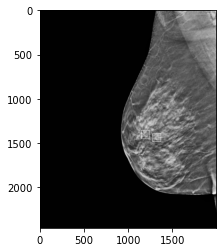

In [18]:
idx = 1

x_center = gt_list[idx][0]
y_center = gt_list[idx][1]
width = gt_list[idx][2]
height = gt_list[idx][3]

img_npy = draw_box(img_npy, x_center=x_center, y_center=y_center, 
                     width=width, height=height, 
                     img_width=img_width, img_height=img_height, color=255)

plt.imshow(img_npy, cmap='gray')

La massa nella riga 0 della GT dovrebbe corrispondere a quella trovata da v5 con probabilità 42%, mentre la massa in riga 1 dovrebbe corrispondere a quella trovata da v5 in riga 1 (0 0.66483 0.58079 0.0911824 0.0659341 0.17878).

Le altre due dovrebbero uscire come falsi positivi.

In [22]:
# vediamo la massa con P=42%
detection = pred_list[0]

distances = []
# per ogni elemento trovato, inizializzo una lista, 
# poi guardo quanto dista da tutti i bbox della gt e appendo alla lista
for bbox in gt_list:
    pred_xy = np.array(detection[0:2])
    gt_xy = np.array(bbox[0:2])

    distance = linalg.norm(pred_xy - gt_xy)
    distances.append(distance)

closest_item = np.argmin(distances)
diagonal = np.hypot(gt_list[closest_item][2], gt_list[closest_item][3])


In [23]:
closest_item

0

In [24]:
distances

[0.01046996461620727, 0.07705319820578385]

In [25]:
(1.5*diagonal)/2

0.04668324313033199